# 1. Selecão

In [97]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

In [98]:
adult = fetch_ucirepo(id=2)

In [99]:
df = adult.data.features
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [100]:
target = adult.data.targets
target.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [101]:
df["income"] = target

# 2. Pré-Processamento

In [102]:
print(f"Shape inicial: {df.shape}")
df.head()

Shape inicial: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


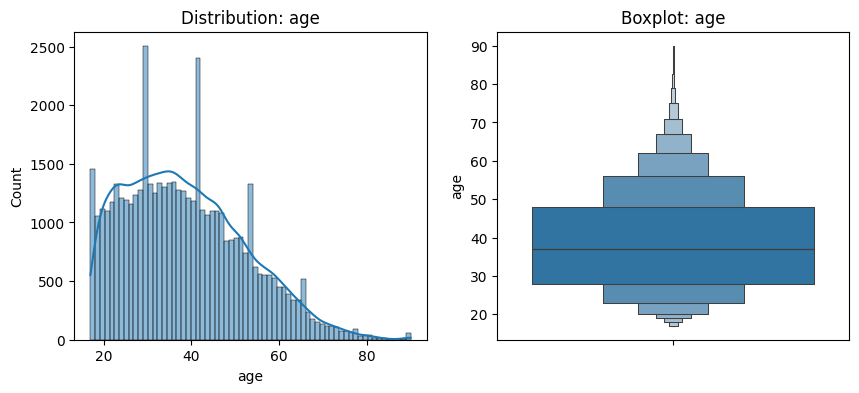

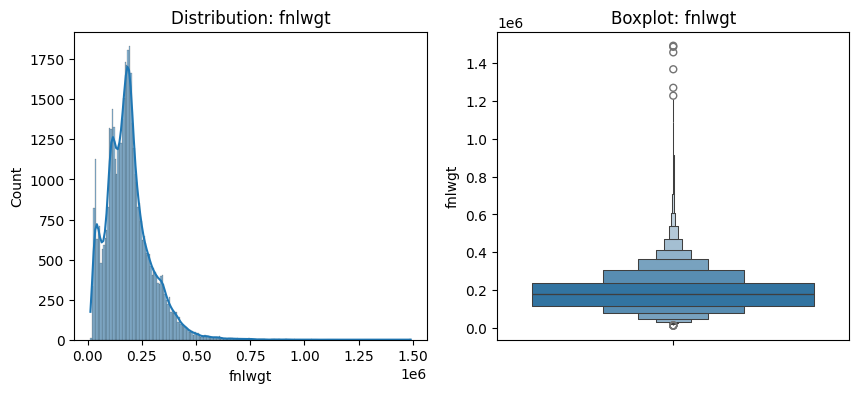

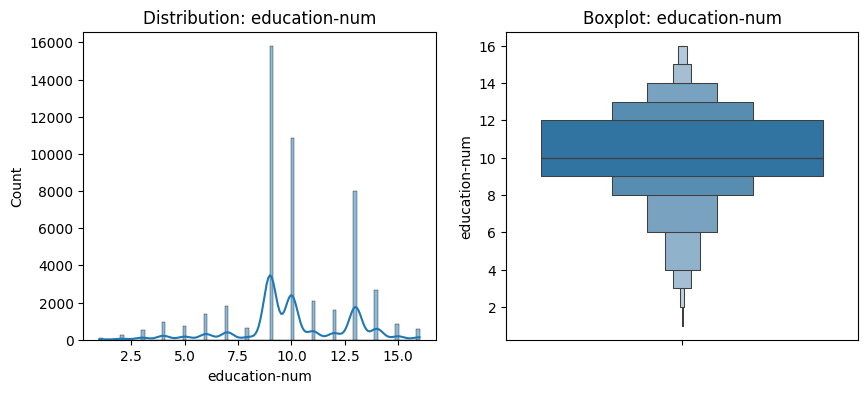

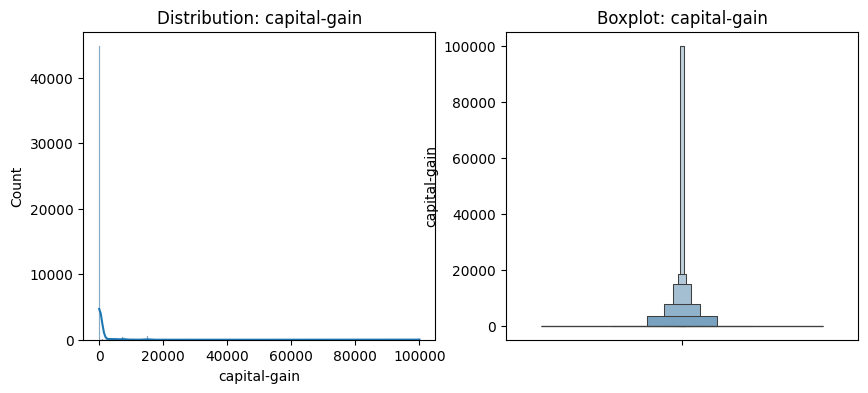

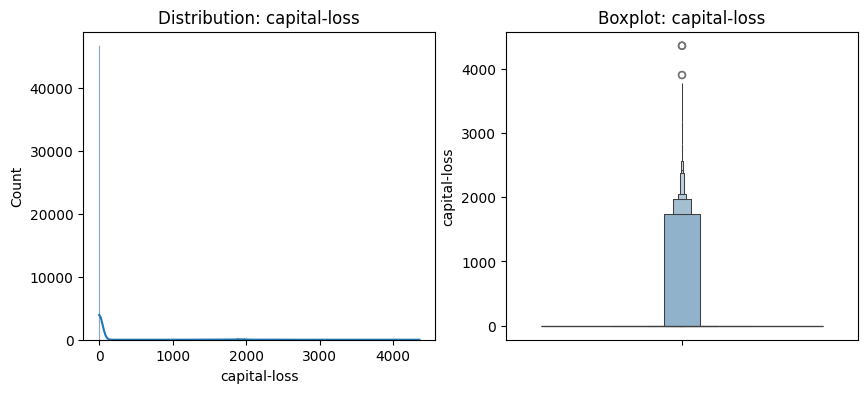

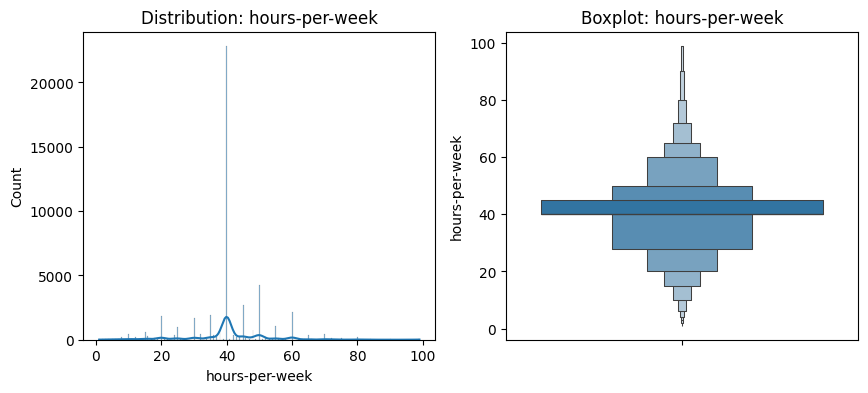

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int', 'float'])

for col in num_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')

    plt.subplot(1,2,2)
    sns.boxenplot(df[col])
    plt.title(f'Boxplot: {col}')

    plt.show()

In [105]:
import numpy as np

df['fnlwgt_logmod'] = np.sign(df['fnlwgt']) * np.log1p(np.abs(df['fnlwgt']))

In [106]:
print("Valores ausentes por coluna:")
print(df.isna().sum())
print(f"\nTotal de linhas com valores ausentes: {df.isna().any(axis=1).sum()}")

Valores ausentes por coluna:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
fnlwgt_logmod       0
dtype: int64

Total de linhas com valores ausentes: 1221


In [107]:
df[df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_logmod
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,11.547308
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.,12.332824
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.,12.610978
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.,11.350642
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.,11.790678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,12.267459
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.,11.883613
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.,10.192868
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.,11.844730


In [108]:
drop = True

if drop:
    df = df.dropna()
    print(f"Shape após remoção de nulos: {df.shape}")
    print("\nVerificação:")
    print(df.isna().sum())
else:
    nan_columns = df.columns[df.isna().any()].tolist()
    print(f"Colunas com valores ausentes: {nan_columns}")
    for column in nan_columns:
        print(f"Preenchendo valores ausentes na coluna '{column}' com a moda.")
        df[column] = df[column].fillna(df[column].mode()[0])
    print("\nVerificação:")
    print(df.isna().sum())

Shape após remoção de nulos: (47621, 16)

Verificação:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
fnlwgt_logmod     0
dtype: int64


In [109]:
num_duplicates = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicates}")

if num_duplicates > 0:
    print("\nExemplos de duplicatas:")
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))
    df = df.drop_duplicates()

Número de linhas duplicadas: 29

Exemplos de duplicatas:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_logmod
36461,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.,12.842747
48521,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.,12.842747
17673,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,11.485164
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,11.485164
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K,11.836124
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K,11.836124
15189,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K,11.896009
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K,11.896009
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K,12.435516
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K,12.435516


In [110]:
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col} ({n_unique} valores únicos):")
    print(df[col].unique())
    print()

age (74 valores únicos):
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass (9 valores únicos):
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt (27946 valores únicos):
[ 77516  83311 215646 ... 173449  89686 350977]

education (16 valores únicos):
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

education-num (16 valores únicos):
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status (7 valores únicos):
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation (15 valores únicos):
['Adm-clerical' 'Exec-managerial' 'Handlers-

In [111]:
print("Valores originais de 'income':")
print(df["income"].unique())

df["income"] = df["income"].str.replace(".", "").str.strip()

print("\nValores após limpeza:")
print(df["income"].unique())

Valores originais de 'income':
['<=50K' '>50K' '<=50K.' '>50K.']

Valores após limpeza:
['<=50K' '>50K']


In [112]:
print("Distribuição de 'occupation':")
print(df["occupation"].value_counts())
print(f"\nRegistros com '?': {(df['occupation'] == '?').sum()}")

Distribuição de 'occupation':
occupation
Prof-specialty       6105
Craft-repair         6084
Exec-managerial      6056
Adm-clerical         5586
Sales                5474
Other-service        4887
Machine-op-inspct    3003
Transport-moving     2341
Handlers-cleaners    2065
?                    1843
Farming-fishing      1482
Tech-support         1435
Protective-serv       981
Priv-house-serv       236
Armed-Forces           14
Name: count, dtype: int64

Registros com '?': 1843


In [113]:
print("Distribuição de 'native-country':")
print(df["native-country"].value_counts())
print(f"\nRegistros com '?': {(df['native-country'] == '?').sum()}")

Distribuição de 'native-country':
native-country
United-States                 42936
Mexico                          932
?                               582
Philippines                     293
Germany                         202
Puerto-Rico                     180
Canada                          177
El-Salvador                     153
India                           147
Cuba                            136
England                         123
China                           120
South                           110
Italy                           105
Jamaica                         104
Dominican-Republic              100
Japan                            92
Vietnam                          86
Columbia                         85
Guatemala                        85
Poland                           85
Haiti                            71
Portugal                         65
Taiwan                           64
Iran                             57
Greece                           49
Nicaragua      

In [114]:
drop = True

if drop:
    shape_before = df.shape
    print(f"Shape antes da remoção: {df.shape}")

    df = df[(df["occupation"] != "?") & (df["native-country"] != "?")]

    print(f"Shape após remoção: {df.shape}")
    print(f"Registros removidos: {shape_before[0] - df.shape[0]}")
else:
    for col in ["occupation", "native-country"]:
        print(f"Preenchendo '?' na coluna '{col}' com a moda.")
        df[col] = df[col].replace("?", df[col].mode()[0])

    print("\nVerificação:")
    for col in ["occupation", "native-country"]:
        display(df[col].value_counts())

Shape antes da remoção: (47592, 16)
Shape após remoção: (45194, 16)
Registros removidos: 2398


In [115]:
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col} ({n_unique} valores únicos):")
    print(df[col].unique())
    print()

age (74 valores únicos):
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

workclass (7 valores únicos):
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

fnlwgt (26741 valores únicos):
[ 77516  83311 215646 ... 173449  89686 350977]

education (16 valores únicos):
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

education-num (16 valores únicos):
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

marital-status (7 valores únicos):
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation (14 valores únicos):
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-spe

In [116]:
print("Colunas antes da remoção:")
print(df.columns.tolist())

df = df.drop(columns=["education-num", "fnlwgt"])

print("\nColunas após remoção:")
print(df.columns.tolist())
print(f"\nShape final: {df.shape}")

Colunas antes da remoção:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'fnlwgt_logmod']

Colunas após remoção:
['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'fnlwgt_logmod']

Shape final: (45194, 14)


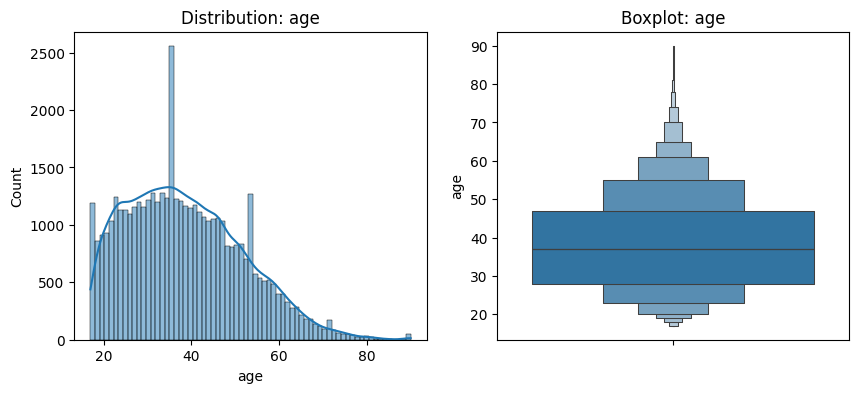

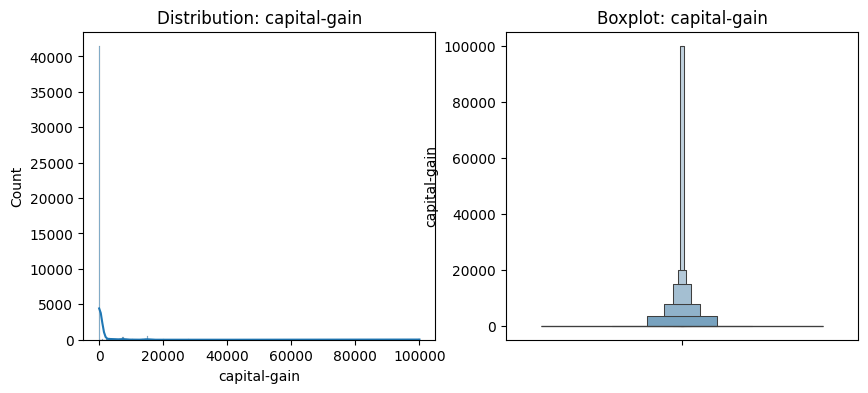

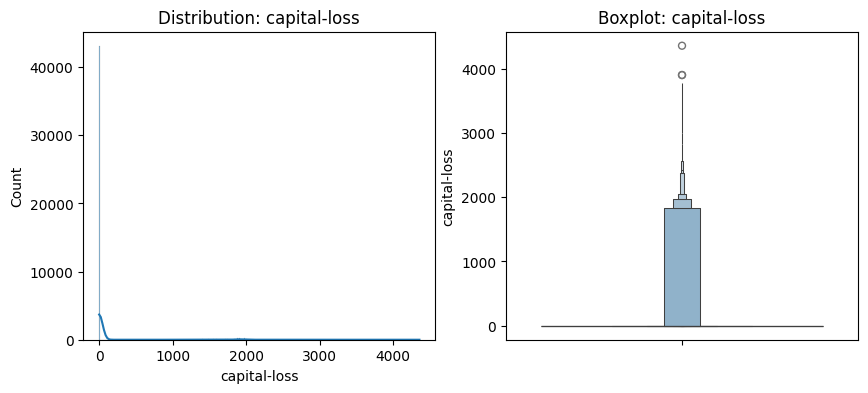

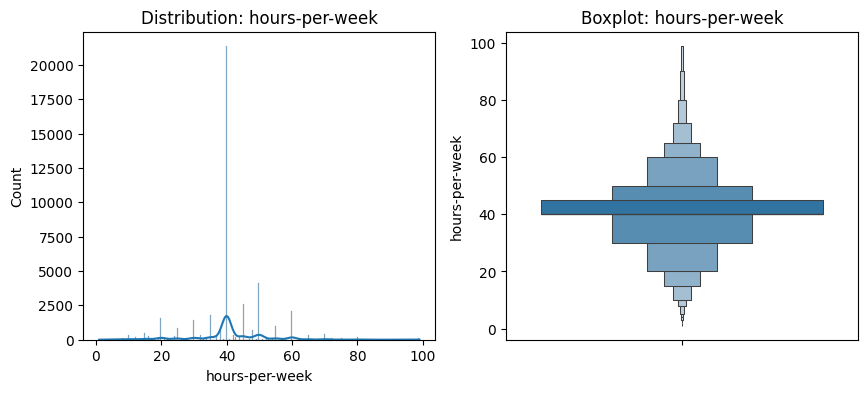

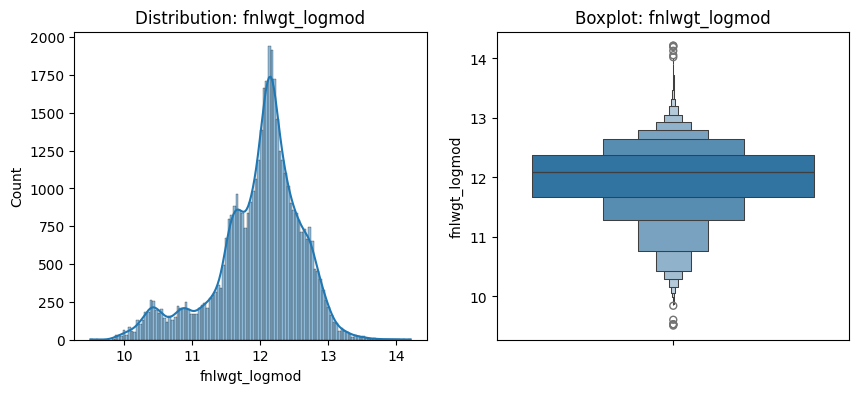

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int', 'float'])

for col in num_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')

    plt.subplot(1,2,2)
    sns.boxenplot(df[col])
    plt.title(f'Boxplot: {col}')

    plt.show()

# 3. Transformação

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [119]:
print(f"Shape do dataset: {df.shape}")
df.head()

Shape do dataset: (45194, 14)


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_logmod
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,11.258253
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,11.330348
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,12.281398
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,12.366157
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,12.732013


In [120]:
y = (df["income"] == ">50K").astype(int)
X = df.drop(columns=["income"])

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
print("\nDistribuição da variável target:")
print(y.value_counts())
print("\nProporção:")
print(y.value_counts(normalize=True))

Shape de X: (45194, 13)
Shape de y: (45194,)

Distribuição da variável target:
income
0    33988
1    11206
Name: count, dtype: int64

Proporção:
income
0    0.752047
1    0.247953
Name: proportion, dtype: float64


In [121]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print(f"Variáveis numéricas ({len(numerical_cols)}):")
print(numerical_cols)
print(f"\nVariáveis categóricas ({len(categorical_cols)}):")
print(categorical_cols)

Variáveis numéricas (5):
['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt_logmod']

Variáveis categóricas (8):
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nDistribuição em treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição em teste:")
print(y_test.value_counts(normalize=True))

Shape de X_train: (36155, 13)
Shape de X_test: (9039, 13)
Shape de y_train: (36155,)
Shape de y_test: (9039,)

Distribuição em treino:
income
0    0.75204
1    0.24796
Name: proportion, dtype: float64

Distribuição em teste:
income
0    0.752074
1    0.247926
Name: proportion, dtype: float64


In [123]:
print("Aplicando One-Hot Encoding...")

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=False)

print("\nShape após encoding:")
print(f"X_train_encoded: {X_train_encoded.shape}")
print(f"X_test_encoded: {X_test_encoded.shape}")

Aplicando One-Hot Encoding...



Shape após encoding:
X_train_encoded: (36155, 103)
X_test_encoded: (9039, 102)


In [124]:
print("Alinhando colunas entre treino e teste...")

X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join="left",
    axis=1,
    fill_value=0,
)

print("\nShape após alinhamento:")
print(f"X_train_encoded: {X_train_encoded.shape}")
print(f"X_test_encoded: {X_test_encoded.shape}")
print(f"\nColunas idênticas: {X_train_encoded.columns.equals(X_test_encoded.columns)}")

Alinhando colunas entre treino e teste...

Shape após alinhamento:
X_train_encoded: (36155, 103)
X_test_encoded: (9039, 103)

Colunas idênticas: True


In [125]:
print("Colunas numéricas a serem normalizadas:")
print(numerical_cols)

existing_num_cols = [col for col in numerical_cols if col in X_train_encoded.columns]
print("\nColunas numéricas presentes:")
print(existing_num_cols)

Colunas numéricas a serem normalizadas:
['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt_logmod']

Colunas numéricas presentes:
['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt_logmod']


In [126]:
standard = True

scaler = StandardScaler() if standard else MinMaxScaler()

X_train_encoded[existing_num_cols] = scaler.fit_transform(X_train_encoded[existing_num_cols])
X_test_encoded[existing_num_cols] = scaler.transform(X_test_encoded[existing_num_cols])

print("\nEstatísticas das variáveis numéricas no treino:")
print(X_train_encoded[existing_num_cols].describe())


Estatísticas das variáveis numéricas no treino:
                age  capital-gain  capital-loss  hours-per-week  fnlwgt_logmod
count  3.615500e+04  3.615500e+04  3.615500e+04    3.615500e+04   3.615500e+04
mean   1.662617e-16  2.358322e-18 -1.660652e-17   -5.581362e-17  -6.343886e-16
std    1.000014e+00  1.000014e+00  1.000014e+00    1.000014e+00   1.000014e+00
min   -1.629085e+00 -1.468068e-01 -2.194940e-01   -3.310955e+00  -3.890476e+00
25%   -7.969652e-01 -1.468068e-01 -2.194940e-01   -7.714343e-02  -4.913817e-01
50%   -1.161397e-01 -1.468068e-01 -2.194940e-01   -7.714343e-02   1.676973e-01
75%    6.403332e-01 -1.468068e-01 -2.194940e-01    3.374478e-01   6.280473e-01
max    3.893166e+00  1.312316e+01  9.067077e+00    4.815033e+00   3.534733e+00


# Data Mining

In [127]:
import pickle
from pathlib import Path

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [128]:
models_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["liblinear", "lbfgs"],
            "penalty": ["l2"],
        },
    },

    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20, 30],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ["sqrt"],
        },
    },

    "XGBoost": {
        "model": XGBClassifier(random_state=42, eval_metric="logloss", n_jobs=-1),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.3],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0],
        },
    },
}

In [129]:
results = {}
for name, mp in models_params.items():
    grid_search = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        verbose=1,
    )

    grid_search.fit(X_train_encoded, y_train.values.ravel())

    results[name] = {
        "best_model": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "test_score": grid_search.score(X_test_encoded, y_test),
    }

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [130]:
comparison = pd.DataFrame({
    "model": list(results.keys()),
    "test_score": [results[m]["test_score"] for m in results],
}).sort_values("test_score", ascending=False)

print(comparison.to_string(index=False))

              model  test_score
            XGBoost    0.867463
      Random Forest    0.857396
Logistic Regression    0.845116


In [131]:
best_model_name = comparison.iloc[0]["model"]
best_model = results[best_model_name]["best_model"]

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test_score']:.4f}")
print(f"Best Hyperparameters: {results[best_model_name]['best_params']}")

Best Model: XGBoost
Test Accuracy: 0.8675
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


# Avaliação

In [132]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [133]:
y_pred = best_model.predict(X_test_encoded)
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      6798
        >50K       0.78      0.65      0.71      2241

    accuracy                           0.87      9039
   macro avg       0.83      0.79      0.81      9039
weighted avg       0.86      0.87      0.86      9039

Accuracy: 86.75%
Precision: 77.84%


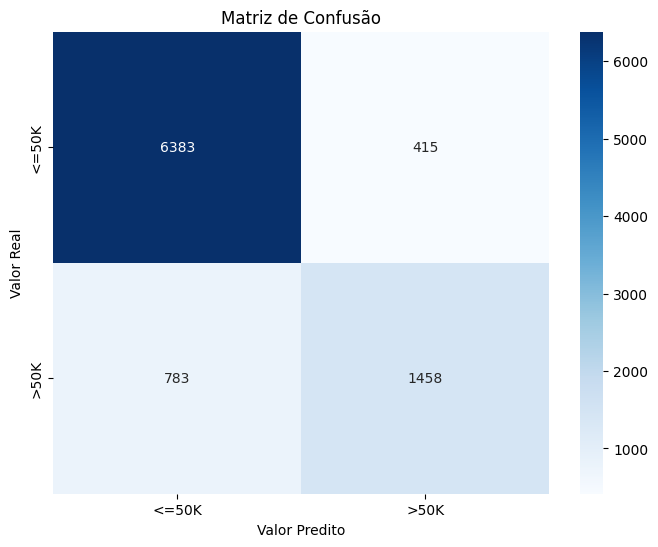

Verdadeiros Negativos (<=50K corretos): 6383
Falsos Positivos (previu >50K, era <=50K): 415
Falsos Negativos (previu <=50K, era >50K): 783
Verdadeiros Positivos (>50K corretos): 1458


In [134]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["<=50K", ">50K"],
    yticklabels=["<=50K", ">50K"],
)
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.title("Matriz de Confusão")
plt.show()

print(f"Verdadeiros Negativos (<=50K corretos): {cm[0,0]}")
print(f"Falsos Positivos (previu >50K, era <=50K): {cm[0,1]}")
print(f"Falsos Negativos (previu <=50K, era >50K): {cm[1,0]}")
print(f"Verdadeiros Positivos (>50K corretos): {cm[1,1]}")